In [121]:
from sympy import symbols, Function, exp
import sympy as sp
from scipy.special import factorial
from IPython.display import display, Math, Latex
import numpy as np
import math
import matplotlib.pyplot as plt

# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Kenny Zhu Ye, Samir Mercado
*   Código: 200164380, 200161553


Dado el problema de valor inicial
$$y'=\frac{2}{t}y+t^2e^t,\, 1\leq t\leq2,\, y(1)=0,$$
con solución exacta $y(t)=t^2(e^t-e)$:



1.   Encuentre $n$ para el método de Taylor tal que el error absoluto sea del orden de $10^{-6}$. Use $h=0.1$
2.   Use los valores generados en el inciso anterior para el $n$ encontrado y una aproximación de la forma $be^{ax}$ por mínimos cuadrados para aproximar $y$ en los siguientes valores, compare con los valores reales de $y$.

  *   $y(1.04)$
  *   $y(1.55)$
  *   $y(1.97)$

In [122]:
def derivadas(equation, variable, orden):
    derivada = [equation]  # Inicializa la lista de derivada con la ecuación original

    for _ in range(1, orden):  # Itera desde 1 hasta el número de derivada deseado - 1
        derivative = sp.diff(derivada[-1], variable)  # Calcula la derivada de la última ecuación en la lista
        derivative_subs = derivative.subs(sp.diff(y, variable), equation)  # Sustituye la derivada de y en la ecuación calculada
        derivada.append(derivative_subs)  # Añade la derivada sustituida a la lista de derivada
        
    return derivada 

In [123]:
def taylor_method(derivadas, wi, t0, h, n, orden):
    # Convertimos las funciones de las derivadas en funciones lambda que podemos evaluar
    derivative_funcs = [sp.lambdify((t, y), d) for d in derivadas]

    # Inicializamos una lista vacía para almacenar los valores de y en cada iteración
    wi_values = []

    # Realizamos n iteraciones
    for _ in range(n):
        # Inicializamos el incremento en y para esta iteración
        wi_increment = 0
        # Calculamos cada término de la serie de Taylor y los sumamos para obtener el incremento en y
        for i in range(orden):
            wi_increment += h**(i+1) / factorial(i+1) * derivative_funcs[i](t0, wi)
        # Actualizamos el valor de y y t para la siguiente iteración
        wi += wi_increment
        t0 += h
        
        wi_values.append(wi)
        
    return wi_values

## Punto 1

In [124]:
t = sp.Symbol('t')
y = Function('y')(t)

w0 = 0  
t0 = 1  
h = 0.1  
tf = 2
n = int((tf - t0) / h) 

dydt = (2/t) * y + t**2 * exp(t)  
orden = 5

derivatives_list = derivadas(dydt, t, orden)

approximate_wi = taylor_method(derivatives_list, w0, t0, h, n, orden)

print("valores teoricos")
for i in approximate_wi:
    print(i)

valores teoricos
0.3459197110737557
0.8666421499927246
1.6072144100273449
2.6203585307563673
3.967664842935865
5.720959555669208
7.963870891228652
10.793621347889246
14.323077375628223
18.683091938625267


In [125]:
def y_exact(t):
    return t**2 * (math.exp(t) - math.exp(1))

t_values = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

y_exact_values = [y_exact(t) for t in t_values]

print("valores reales")
for i in y_exact_values:
    print(i)

valores reales
0.3459198765397399
0.866642535759603
1.607215078180737
2.6203595512358335
3.9676662942277936
5.72096152559634
7.963873477844967
10.793624660490641
14.323081535891006
18.683097081886423


In [126]:
errors = [abs(y_exact_value - approximate_value) for y_exact_value, approximate_value in zip(y_exact_values, approximate_wi)]

print("Errores absolutos:")
for i, error in enumerate(errors):
    print(f"Error en t = {t_values[i]}: {error}")

display(Latex(("el orden o n para que el error sea de $10^-6$ con $h=0.1$ es de 5")))

Errores absolutos:
Error en t = 1.1: 1.6546598419209246e-07
Error en t = 1.2: 3.857668784412738e-07
Error en t = 1.3: 6.681533921693017e-07
Error en t = 1.4: 1.0204794662627137e-06
Error en t = 1.5: 1.4512919284115355e-06
Error en t = 1.6: 1.9699271316397926e-06
Error en t = 1.7: 2.586616314914636e-06
Error en t = 1.8: 3.3126013949669186e-06
Error en t = 1.9: 4.160262783159396e-06
Error en t = 2.0: 5.1432611556379015e-06


<IPython.core.display.Latex object>

## Punto 2

In [127]:
t_array = np.array(t_values)
y_array = np.array(approximate_wi)

# Aplicamos logaritmo natural a los valores de y
y_log = np.log(y_array)

# Construimos la matriz A y el vector b para el sistema lineal Ax = b
A = np.zeros((len(t_array), 2))
A[:, 0] = t_array
A[:, 1] = 1

b_vector = y_log

print("vector b")
print(b_vector)

# Resolvemos el sistema lineal usando la función de numpy lstsq
x, _, _, _ = np.linalg.lstsq(A, b_vector, rcond=None)

# Obtenemos a y ln_b a partir del vector x
print("constantes hallados:")
print("a")
a = x[0]
print(a)

print("ln_b")
ln_b = x[1]
print(ln_b)

# Obtenemos b a partir de ln_b
b = np.exp(ln_b)

# Definimos la función aproximada
def y_approx(t):
    return b * np.exp(a * t)

# Evaluamos y_approx en los puntos solicitados
t_values_to_evaluate = [1.04, 1.55, 1.97]
y_approx_values = [y_approx(t) for t in t_values_to_evaluate]
y_exact_values_to_evaluate = [y_exact(t) for t in t_values_to_evaluate]

print("Valores aproximados:")
for i, val in enumerate(y_approx_values):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nValores exactos:")
for i, val in enumerate(y_exact_values_to_evaluate):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nErrores absolutos:")
for i in range(len(y_approx_values)):
    error = abs(y_approx_values[i] - y_exact_values_to_evaluate[i])
    print(f"Error en t = {t_values_to_evaluate[i]}: {error}")

vector b
[-1.06154858 -0.14312913  0.4745025   0.96331115  1.37817772  1.74413655
  2.07491517  2.37895534  2.66187204  2.92761894]
constantes hallados:
a
4.167306120653952
ln_b
-5.119443316547502
Valores aproximados:
y(1.04) = 0.4559167959823953
y(1.55) = 3.8185897171689915
y(1.97) = 21.98036909489238

Valores exactos:
y(1.04) = 0.11998749706134393
y(1.55) = 4.788635020801403
y(1.97) = 17.279298435557664

Errores absolutos:
Error en t = 1.04: 0.3359292989210514
Error en t = 1.55: 0.970045303632411
Error en t = 1.97: 4.701070659334718


In [128]:
# Creamos una función para graficar
def plot_RL(t_values_exact, y_values_exact, t_values_approx, y_values_approx, label):
    plt.plot(t_values_exact, y_values_exact, 'bo', label='Valores exactos')
    plt.plot(t_values_approx, y_values_approx, 'r-', label=label)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title('Aproximación usando mínimos cuadrados')
    plt.grid(True)
    plt.show()

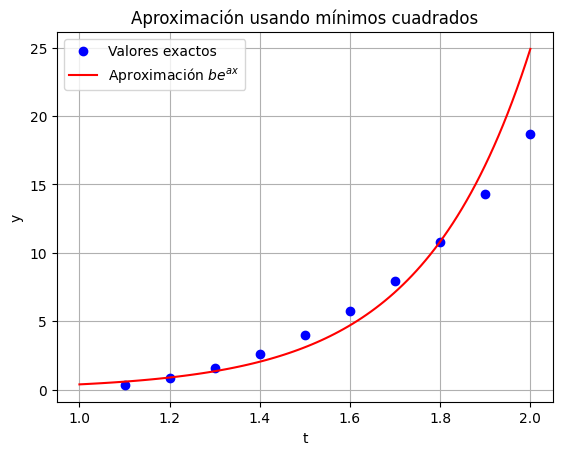

In [129]:
# Creamos puntos adicionales para una gráfica más suave
t_points_smooth = np.linspace(1, 2, 100)
y_approx_smooth = [y_approx(t) for t in t_points_smooth]

# Graficamos la función aproximada y los valores exactos
plot_RL(t_values, y_exact_values, t_points_smooth, y_approx_smooth, 'Aproximación $be^{ax}$')


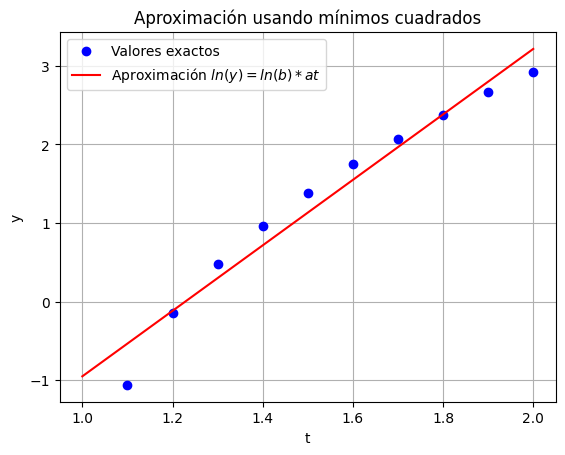

In [130]:
# Calculamos los valores de ln y para los puntos de la aproximación
y_log_approx = [np.log(y) for y in approximate_wi]

# Creamos puntos adicionales para una gráfica más suave
t_points_smooth = np.linspace(1, 2, 100)
y_line_smooth = [ln_b + a * t for t in t_points_smooth]

# Graficamos la regresión lineal y los valores de ln y
plot_RL(t_values, y_log_approx, t_points_smooth, y_line_smooth, 'Aproximación $ln(y) = ln(b)*at$')


**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte ([pdf](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf)).